# RNN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# 파일 
df = pd.read_csv('전체데이터_병합.csv',encoding='cp949',parse_dates=['y_m'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   y_m               1666 non-null   datetime64[ns]
 1   city              1666 non-null   object        
 2   location          1666 non-null   object        
 3   area_cnt          1666 non-null   float64       
 4   em_cnt            1666 non-null   int64         
 5   em_g              1666 non-null   int64         
 6   pay_amt           1666 non-null   int64         
 7   제주도민_여            1666 non-null   float64       
 8   외국인거주_여           1666 non-null   float64       
 9   제주도민_남            1666 non-null   float64       
 10  외국인거주_남           1666 non-null   float64       
 11  제주도민_60이상         1666 non-null   float64       
 12  제주도민_60미만         1666 non-null   float64       
 13  total_pop         1666 non-null   float64       
 14  패스트푸드_결제건수        1666 n

,y_m,city,location,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
0,2018-01-01,서귀포시,남원읍,52.0,9570,42437700,1270773,9306.0,200.0,9806.0,...,6.256586,62.920699,1.891667,0.0,0.0,0.0,0.0,7650.915819,469.700347,1686.010590
1,2018-01-01,서귀포시,대륜동,38.0,21666,57612600,1676850,6637.0,95.0,6836.0,...,8.004301,66.793011,2.958333,0.0,0.0,0.0,0.0,7964.610507,371.723546,420.833558
2,2018-01-01,서귀포시,대정읍,89.0,10185,38885550,1164122,10725.0,677.0,10360.0,...,5.417876,70.940860,1.870833,0.0,0.0,0.0,0.0,4994.300798,410.511223,356.262995
3,2018-01-01,서귀포시,대천동,37.0,20280,53858550,1593709,6475.0,137.0,6685.0,...,8.004301,66.793011,2.958333,0.0,0.0,0.0,0.0,4671.393555,234.238089,225.574534
4,2018-01-01,서귀포시,동홍동,49.0,45936,118701000,3501286,11569.0,642.0,11124.0,...,5.771505,69.944892,3.812500,0.0,0.0,0.0,0.0,3881.022202,270.258431,353.699388


In [4]:
df.isnull().sum()

y_m                 0
city                0
location            0
area_cnt            0
em_cnt              0
em_g                0
pay_amt             0
제주도민_여              0
외국인거주_여             0
제주도민_남              0
외국인거주_남             0
제주도민_60이상           0
제주도민_60미만           0
total_pop           0
패스트푸드_결제건수          0
패스트푸드_결제금액          0
간식_결제건수             0
간식_결제금액             0
농축수산물_결제건수          0
농축수산물_결제금액          0
마트/슈퍼마켓_결제건수        0
마트/슈퍼마켓_결제금액        0
식품_결제건수             0
식품_결제금액             0
배달_결제건수             0
배달_결제금액             0
식당_결제건수             0
식당_결제금액             0
풍속                  0
기온                  0
습도                  0
강수                  0
전국_누적확진자            0
전국_월별확진자            0
제주_누적확진자            0
제주_월별확진자            0
visit_pop_cnt       0
visit_pop_cnt_lf    0
visit_pop_cnt_sf    0
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df['y_m'] = pd.to_datetime(df['y_m'],format='%Y%m')
df['year'] = df['y_m'].dt.year
df

,y_m,city,location,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,...,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf,year
0,2018-01-01,서귀포시,남원읍,52.0,9570,42437700,1270773,9306.0,200.0,9806.0,...,62.920699,1.891667,0.0,0.0,0.0,0.0,7650.915819,469.700347,1686.010590,2018
1,2018-01-01,서귀포시,대륜동,38.0,21666,57612600,1676850,6637.0,95.0,6836.0,...,66.793011,2.958333,0.0,0.0,0.0,0.0,7964.610507,371.723546,420.833558,2018
2,2018-01-01,서귀포시,대정읍,89.0,10185,38885550,1164122,10725.0,677.0,10360.0,...,70.940860,1.870833,0.0,0.0,0.0,0.0,4994.300798,410.511223,356.262995,2018
3,2018-01-01,서귀포시,대천동,37.0,20280,53858550,1593709,6475.0,137.0,6685.0,...,66.793011,2.958333,0.0,0.0,0.0,0.0,4671.393555,234.238089,225.574534,2018
4,2018-01-01,서귀포시,동홍동,49.0,45936,118701000,3501286,11569.0,642.0,11124.0,...,69.944892,3.812500,0.0,0.0,0.0,0.0,3881.022202,270.258431,353.699388,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2021-06-01,제주시,일도2동,87.0,84360,147438200,4402149,16569.0,200.0,16077.0,...,75.793056,5.058333,156961.0,16603.0,1264.0,234.0,2601.794246,210.270986,11.877085,2021
1662,2021-06-01,제주시,조천읍,141.0,27732,63927750,1911187,12422.0,242.0,13017.0,...,82.505556,6.250000,156961.0,16603.0,1264.0,234.0,13478.916454,377.112397,30.738787,2021
1663,2021-06-01,제주시,한경면,71.0,8031,27060150,809898,4531.0,100.0,4627.0,...,93.737500,7.270833,156961.0,16603.0,1264.0,234.0,3886.111826,603.810148,13.838063,2021
1664,2021-06-01,제주시,한림읍,112.0,25653,82746990,2476292,10341.0,1140.0,10891.0,...,92.995833,6.758333,156961.0,16603.0,1264.0,234.0,11498.611893,607.927826,28.297822,2021


In [7]:
# df_l = df['location'] == '노형동'
# dfl = df[df_l]
# dfl

In [8]:
# df_l = df['location'] == '건입동'
# dfl = df[df_l]
# dfl

In [9]:
# df_l = df['location'] == '연동'
# dfl = df[df_l]
# dfl

In [10]:
df_l = df['location'] == '이도2동'
dfl = df[df_l]
dfl.head()

,y_m,city,location,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,...,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf,year
33,2018-01-01,제주시,이도2동,132.0,99670,246651600,7371540,25593.0,344.0,24510.0,...,66.350806,2.800000,0.0,0.0,0.0,0.0,9500.168487,364.876434,382.120633,2018
71,2018-02-01,제주시,이도2동,132.0,92603,230440750,6886558,25488.0,332.0,24417.0,...,60.744048,4.441667,0.0,0.0,0.0,0.0,7792.103017,279.647920,467.776635,2018
109,2018-03-01,제주시,이도2동,132.0,103323,249276500,7448453,25421.0,341.0,24400.0,...,73.116935,6.412500,0.0,0.0,0.0,0.0,7147.519154,416.328403,578.426275,2018
147,2018-04-01,제주시,이도2동,132.0,102728,227249550,6788163,25420.0,342.0,24393.0,...,68.836111,4.329167,0.0,0.0,0.0,0.0,6444.142002,345.196087,462.643298,2018
185,2018-05-01,제주시,이도2동,132.0,113606,234533700,7004233,25435.0,354.0,24448.0,...,75.809140,3.908333,0.0,0.0,0.0,0.0,7033.500662,339.273425,409.187974,2018


In [13]:
# 정규화
scaler = MinMaxScaler()
scale_cols =  dfl.drop(columns=['y_m', 'city','location'], axis=1)
scale_cols[:] = scaler.fit_transform(scale_cols[:])
# 유의변수 추출
scale_cols = scale_cols.drop(columns=['제주도민_60미만','total_pop','식당_결제금액','식당_결제건수','간식_결제금액','간식_결제건수','패스트푸드_결제금액','패스트푸드_결제건수','마트/슈퍼마켓_결제건수','배달_결제건수','식품_결제건수','농축수산물_결제금액','제주도민_남','외국인거주_여','습도','전국_누적확진자','전국_월별확진자','제주_누적확진자','제주_월별확진자','visit_pop_cnt_lf'], axis=1)
scale_cols.head()

,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_남,제주도민_60이상,농축수산물_결제건수,마트/슈퍼마켓_결제금액,식품_결제금액,배달_결제금액,풍속,기온,강수,visit_pop_cnt,visit_pop_cnt_sf,year
33,0.0,0.245119,0.530298,0.531984,1.000000,0.000000,0.000000,0.186319,0.599766,0.003398,0.005017,0.208079,0.000000,0.091029,0.768372,0.498206,0.0
71,0.0,0.140992,0.403869,0.405325,0.732824,0.015873,0.018366,0.190725,0.558672,0.130471,0.000000,0.363758,0.029616,0.156240,0.424980,0.613034,0.0
109,0.0,0.298944,0.550769,0.552070,0.562341,0.095238,0.035465,0.000000,0.528745,0.081905,0.021323,0.250381,0.258864,0.234525,0.295392,0.761367,0.0
147,0.0,0.290177,0.378981,0.379629,0.559796,0.126984,0.050032,0.097623,0.610611,0.000000,0.015921,0.224088,0.442676,0.151771,0.153984,0.606152,0.0
185,0.0,0.450456,0.435790,0.436058,0.597964,1.000000,0.089297,0.273507,0.852501,0.152613,0.027940,0.161597,0.580911,0.135055,0.272470,0.534492,0.0


In [14]:
# 데이터셋 분리(시계열)

TEST_SIZE =  36# 3년 데이터
WINDOW_SIZE = 6 # 6개월 데이터

test = scale_cols[:-TEST_SIZE]
train = scale_cols[-TEST_SIZE:]

In [15]:
# 훈련데이터와 테스트데이터 분리에 사용
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [16]:
# 훈련데이터와 테스트데이터 분리
feature_cols = scale_cols.columns
label_cols = ['em_g']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((12, 20, 17), (4, 20, 17))

In [17]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((6, 17), (6, 1))

In [18]:
test_feature, test_label = make_dataset(test_feature, test_label, 4)
test_feature.shape, test_label.shape

((2, 4, 17), (2, 1))

In [19]:
# tensorflow, keras 
import tensorflow as tf
from tensorflow import keras

In [20]:
# keras 모형
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [21]:
import os

model.compile(loss='mean_squared_error', optimizer='adam',metrics=["acc"]) # acc 안나올때
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.1544 - acc: 0.0833 - val_loss: 0.0746 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.07465, saving model to model\tmp_checkpoint.h5
Epoch 2/200
1/1 [==============================] - 0s 44ms/step - loss: 0.1339 - acc: 0.0833 - val_loss: 0.0593 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 0.07465 to 0.05925, saving model to model\tmp_checkpoint.h5
Epoch 3/200
1/1 [==============================] - 0s 48ms/step - loss: 0.1152 - acc: 0.0833 - val_loss: 0.0462 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 0.05925 to 0.04617, saving model to model\tmp_checkpoint.h5
Epoch 4/200
1/1 [==============================] - 0s 48ms/step - loss: 0.0985 - acc: 0.0833 - val_loss: 0.0352 - val_acc: 0.0000e+00

Epoch 00004: val_loss improved from 0.04617 to 0.03521, saving model to model\tmp_checkpoint.h5
Epoch 5/200
1/1 [==============================] - 0s 45ms/step - loss: 0.0835 - a

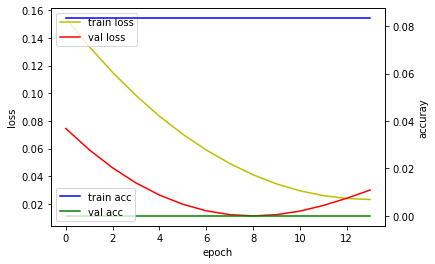

In [23]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

# plt.savefig('rnn_l.png')

In [24]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(2, 1)

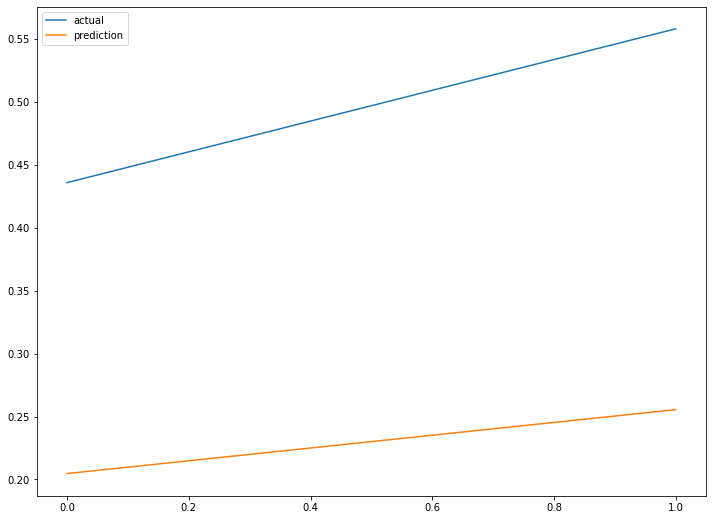

In [25]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
# plt.savefig('rnn_l_p.png')